In [ ]:
import pandas as pd

df = pd.read_csv(
    r"D:\Sudarshan Kasar\Capstone\Twitter Sentiment Analysis\Sentiment_cleaned.csv",
    encoding="latin1"
)

df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df.head()


,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   id      1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [54]:
df.describe(include='all')

,target,id,date,flag,user,text
count,1.599999e+06,1.599999e+06,1599999,1599999,1599999,1599999
unique,NaN,NaN,774362,1,659775,1581465
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1599999,549,210
mean,2.000001e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935757e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467811e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,4.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


In [56]:
df.shape


(1599999, 6)

In [57]:
print(df.columns)


Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')


In [58]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

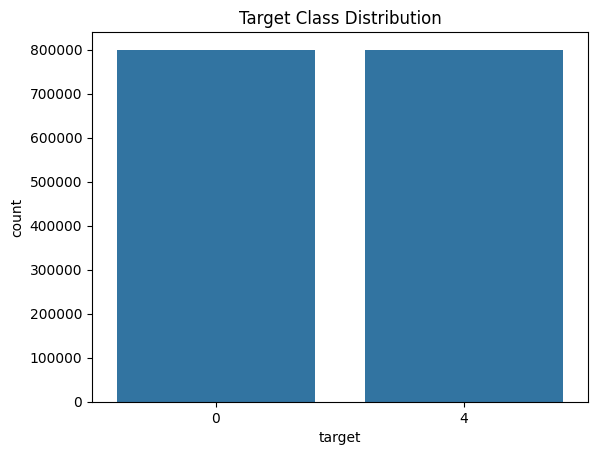

target
0    0.5
4    0.5
Name: proportion, dtype: float64

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()

df['target'].value_counts(normalize=True)


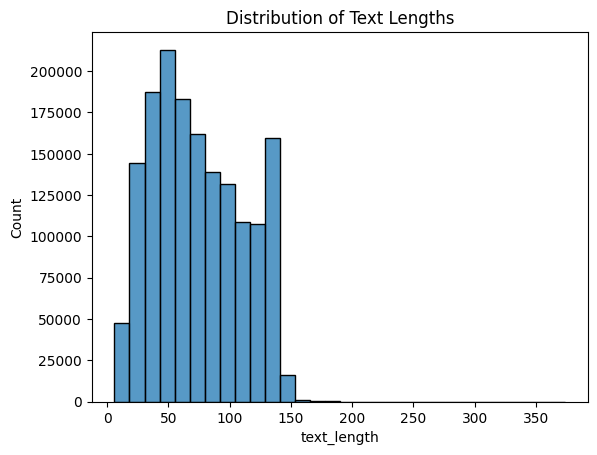

In [39]:
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=30)
plt.title("Distribution of Text Lengths")
plt.show()


In [40]:
for i in range(5):
    print(f"Text: {df['text'][i]}")
    print(f"Target: {df['target'][i]}")
    print('-'*60)


Text: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
Target: 0
------------------------------------------------------------
Text: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
Target: 0
------------------------------------------------------------
Text: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
Target: 0
------------------------------------------------------------
Text: my whole body feels itchy and like its on fire 
Target: 0
------------------------------------------------------------
Text: @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
Target: 0
------------------------------------------------------------


In [41]:
df['has_url'] = df['text'].apply(lambda x: 1 if 'http' in x else 0)
print("Texts with URLs:", df['has_url'].sum())


Texts with URLs: 70183


In [42]:
import re
df['non_alpha'] = df['text'].apply(lambda x: len(re.findall(r'[^a-zA-Z ]', x)))
df['non_alpha'].describe()


count    1.600000e+06
mean     4.603210e+00
std      4.740117e+00
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      3.610000e+02
Name: non_alpha, dtype: float64

In [43]:
df.head()

,target,id,date,flag,user,text,text_length,has_url,non_alpha
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,1,14
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,0,6
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,0,5
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,0,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,0,9


In [44]:
import re
from collections import Counter

def simple_clean(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text.lower().split()

all_words = [word for text in df['text'] for word in simple_clean(text)]
Counter(all_words).most_common(20)


[('i', 960288),
 ('to', 566077),
 ('the', 525386),
 ('a', 385618),
 ('my', 317022),
 ('it', 305502),
 ('and', 303735),
 ('you', 302390),
 ('is', 238648),
 ('in', 217079),
 ('for', 216451),
 ('s', 192873),
 ('t', 185904),
 ('of', 184107),
 ('on', 168525),
 ('me', 166439),
 ('that', 166144),
 ('so', 154299),
 ('have', 145647),
 ('m', 140837)]

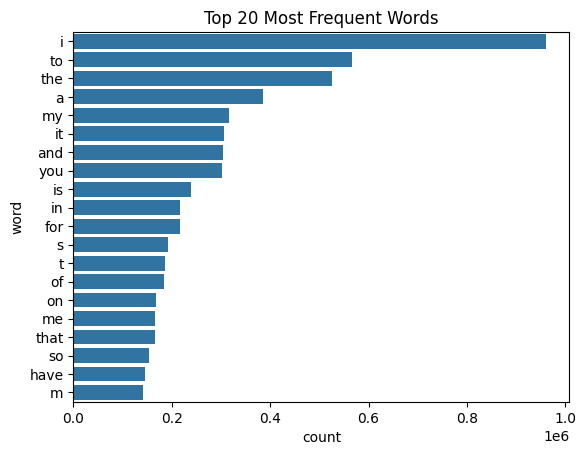

In [45]:
common_words = pd.DataFrame(Counter(all_words).most_common(20), columns=['word', 'count'])
sns.barplot(y='word', x='count', data=common_words)
plt.title("Top 20 Most Frequent Words")
plt.show()


In [ ]:
from wordcloud import WordCloud

text_all = " ".join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [49]:
df.head()

,target,id,date,flag,user,text,text_length,has_url,non_alpha
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,1,14
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,0,6
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,0,5
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,0,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,0,9
